### Data Analysis
Tasks
1. first remove all the emails with @aliaswire.com

2. calculate following basic stats and graphs
    - how unique emails are used
    - what is the average # of unique emails that log in per week
    - make a graph that shows the # of logins by day
    - make a line graph that shows the # of times each unique email logged in
    - pie chart of which browsers are used and which operating system


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
%matplotlib inline
import seaborn as sns
import datetime

In [47]:
df=pd.read_excel("C:/Users/slogn/Documents/freelance project/Sample for Upwork.xlsx")
df.head()

,login_date,last_updated_by,login_device
0,2023-02-05 15:20:19,bbennett@vendingjustright.org ...,Mozilla/5.0 (Linux; Android 12; KB2007) Apple...
1,2023-02-05 14:54:09,admin@amjsolutionsinvestor.com ...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...
2,2023-02-05 13:43:36,admin@amjsolutionsinvestor.com ...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...
3,2023-02-05 13:25:04,docudocllc@gmail.com ...,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like ...
4,2023-02-05 09:12:32,lennyweston03@yahoo.com ...,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0_2 lik...


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9438 entries, 0 to 9437
Data columns (total 3 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                --------------  ----- 
 0    login_date                                                                                                                                                           9438 non-null   object
 1    last_updated_by                                                                                                                                                      9438 non-null   object
 2    login_device                                                                                                    

## Task 1: remove all the emails with @aliaswire.com

In [49]:
df.columns

Index([' login_date          ',
       ' last_updated_by                                                                         ',
       ' login_device                                                                                                                                                       '],
      dtype='object')

In [50]:
# renaming the columns name for easy utilisation
df.columns = ['login_date','email','login_device']
df.head()

,login_date,email,login_device
0,2023-02-05 15:20:19,bbennett@vendingjustright.org ...,Mozilla/5.0 (Linux; Android 12; KB2007) Apple...
1,2023-02-05 14:54:09,admin@amjsolutionsinvestor.com ...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...
2,2023-02-05 13:43:36,admin@amjsolutionsinvestor.com ...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...
3,2023-02-05 13:25:04,docudocllc@gmail.com ...,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like ...
4,2023-02-05 09:12:32,lennyweston03@yahoo.com ...,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0_2 lik...


In [51]:
# take a look on value in the email column
for i in range(20):
    print(df.iloc[-i,1])

 bbennett@vendingjustright.org                                                           
 lennyweston03@yahoo.com                                                                 
 lennyweston03@yahoo.com                                                                 
 pbaiersa@aliaswire.com                                                                  
 pbaiersa@aliaswire.com                                                                  
 PPPBOSTONNORTH@GMAIL.COM [pbaiersa@aliaswire.com]                                       
 pbaiersa@aliaswire.com                                                                  
 gbertsa@aliaswire.com                                                                   
 wayne@gsateams.com [gbertsa@aliaswire.com]                                              
 maria@Addarios.com                                                                      
 gbertsa@aliaswire.com                                                                   
 juniorpie

In [52]:
#split the column last_updated_by

df[['email','plus']]=df.email.str.split('[', expand=True)

In [53]:
df.head()

,login_date,email,login_device,plus
0,2023-02-05 15:20:19,bbennett@vendingjustright.org ...,Mozilla/5.0 (Linux; Android 12; KB2007) Apple...,None
1,2023-02-05 14:54:09,admin@amjsolutionsinvestor.com ...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...,None
2,2023-02-05 13:43:36,admin@amjsolutionsinvestor.com ...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...,None
3,2023-02-05 13:25:04,docudocllc@gmail.com ...,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like ...,None
4,2023-02-05 09:12:32,lennyweston03@yahoo.com ...,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0_2 lik...,None


In [54]:
# defining a function to identify email with the pattern @aliaswire.com
import re
def remove_email_with_pattern(email):
    try:
        re.findall('@aliaswire.com$',email)[0]
        return 1
    except:
        return 0


In [55]:
# testing the function
remove_email_with_pattern(str.strip(' pbaiersa@aliaswire.com         '))

1

In [56]:
# creating a new column to filter out rows with the pattern
df['test']=df['email'].map(lambda x: remove_email_with_pattern(str.strip(x)))
df.head()
print(df.shape)

(9438, 5)


In [57]:
df[df['test'] == 1]

,login_date,email,login_device,plus,test
6,2023-02-05 08:02:35,pbaiersa@aliaswire.com ...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_...,None,1
17,2023-02-04 11:04:44,pbaiersa@aliaswire.com ...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_...,None,1
24,2023-02-04 06:37:05,pbaiersa@aliaswire.com ...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_...,None,1
25,2023-02-04 06:06:55,pbaiersa@aliaswire.com ...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_...,None,1
27,2023-02-04 05:32:00,pbaiersa@aliaswire.com ...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_...,None,1
...,...,...,...,...,...
9428,2023-01-03 07:53:28,gbertsa@aliaswire.com ...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...,None,1
9431,2023-01-03 07:49:47,gbertsa@aliaswire.com ...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...,None,1
9432,2023-01-03 07:27:46,pbaiersa@aliaswire.com ...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_...,None,1
9434,2023-01-03 07:24:55,pbaiersa@aliaswire.com ...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_...,None,1


In [58]:
# defining a new dataset of all the rows not presenting the pattern @aliaswire.com
df2=df[df['test']==0].reset_index()
df2.head()

,index,login_date,email,login_device,plus,test
0,0,2023-02-05 15:20:19,bbennett@vendingjustright.org ...,Mozilla/5.0 (Linux; Android 12; KB2007) Apple...,None,0
1,1,2023-02-05 14:54:09,admin@amjsolutionsinvestor.com ...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...,None,0
2,2,2023-02-05 13:43:36,admin@amjsolutionsinvestor.com ...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...,None,0
3,3,2023-02-05 13:25:04,docudocllc@gmail.com ...,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like ...,None,0
4,4,2023-02-05 09:12:32,lennyweston03@yahoo.com ...,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0_2 lik...,None,0


## Task2: how many unique emails are used

In [59]:
df2['email'][30]

' partneradmin@aw.com '

In [60]:
# removing extra space in the email address
df2['email'] = df2['email'].apply(lambda x: str.strip(x))
df2['email'][30]

'partneradmin@aw.com'

In [61]:
# number of unique emails used
number = df2['email'].nunique()
print(f'The number of unique email in the dataset is {number}')

The number of unique email in the dataset is 350


## Task3: what is the average # of unique emails that log in per week

In [62]:
# casting the column login_date to a date format
df2['login_date'] = df2['login_date'].apply(lambda x: str.strip(x))
df2['login_date']=df2['login_date'].astype('datetime64[ns]')

In [63]:
# checking the data type
df2.dtypes

index                    int64
login_date      datetime64[ns]
email                   object
login_device            object
plus                    object
test                     int64
dtype: object

In [64]:
# creating a new column containing the id of the week
df2['weekofyear']=df2['login_date'].apply(lambda x: x.weekofyear)
df2.head()

,index,login_date,email,login_device,plus,test,weekofyear
0,0,2023-02-05 15:20:19,bbennett@vendingjustright.org,Mozilla/5.0 (Linux; Android 12; KB2007) Apple...,None,0,5
1,1,2023-02-05 14:54:09,admin@amjsolutionsinvestor.com,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...,None,0,5
2,2,2023-02-05 13:43:36,admin@amjsolutionsinvestor.com,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...,None,0,5
3,3,2023-02-05 13:25:04,docudocllc@gmail.com,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like ...,None,0,5
4,4,2023-02-05 09:12:32,lennyweston03@yahoo.com,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0_2 lik...,None,0,5


In [65]:
df2['weekofyear'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [66]:
# removing the duplicates and storing the data in a new dataframe
week_login=df2[['email','weekofyear']].drop_duplicates()
# calculating the number of login of unique user each week
week_login=week_login.groupby(['weekofyear']).count().reset_index()
# calculating the average # of unique emails that log in per week
average=round(week_login['email'].mean())
print(f'the average # of unique emails that log in per week is : {average}')

the average # of unique emails that log in per week is : 183


In [68]:
type(df2['login_date'][0].date())

datetime.date

## Task4: pie chart of which browsers are used and which operating system

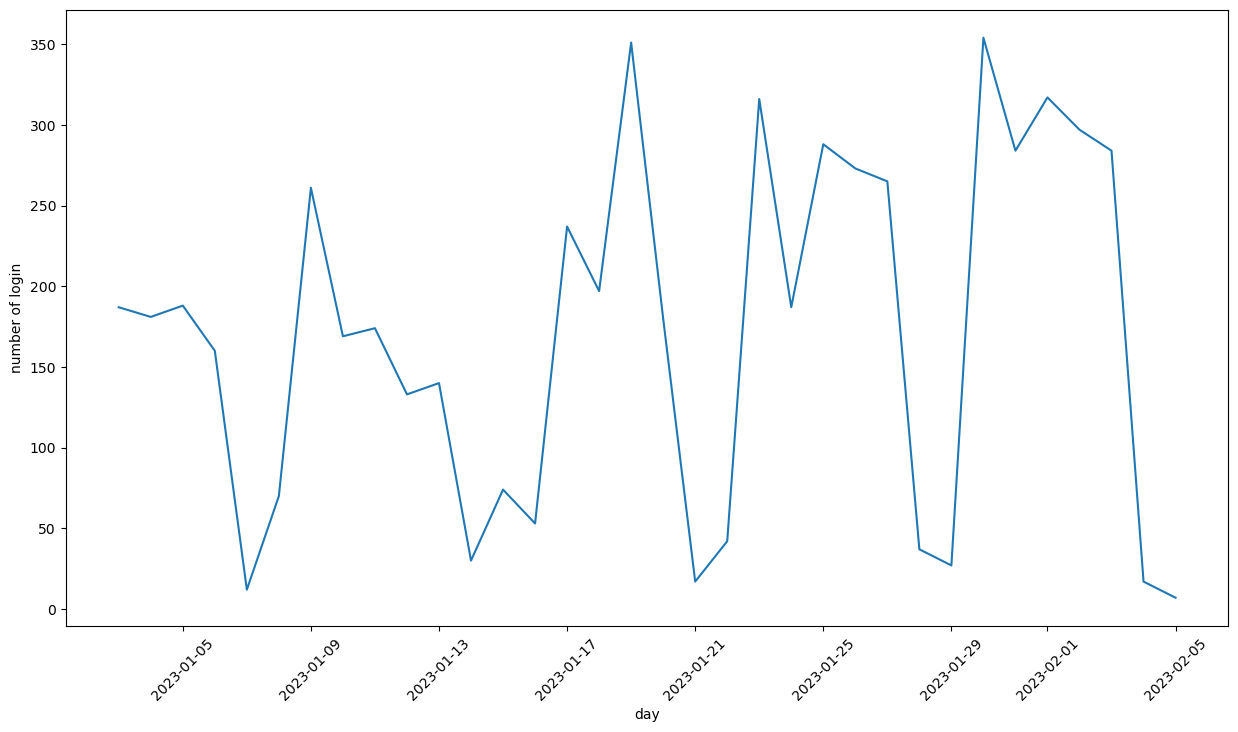

In [70]:
df2['login_date_str']=df2['login_date'].apply(lambda x: x.date())
plt.figure(figsize=(15,8))
df2.groupby('login_date_str').count()['index'].plot()
locs, labels = plt.xticks()
plt.xlabel('day')
plt.ylabel('number of login')
plt.setp(labels, rotation=45)
plt.show()

## Task 4: make a line graph that shows the # of times each unique email logged in

<function matplotlib.pyplot.show(close=None, block=None)>

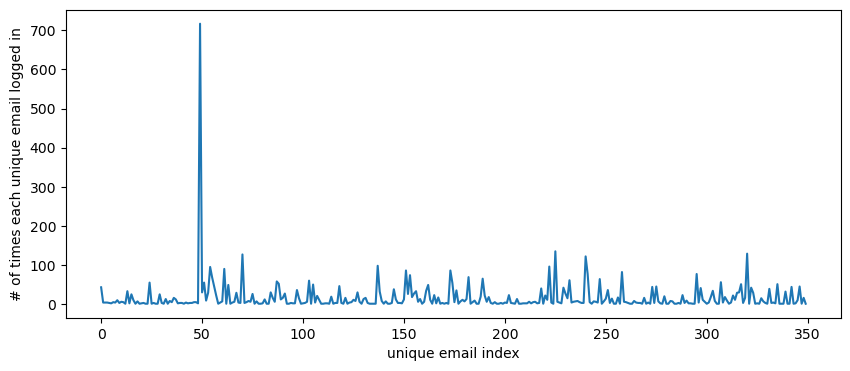

In [71]:
# make a line graph that shows the # of times each unique email logged in
plt.figure(figsize=(10,4))
d=df2.groupby(['email']).count()['login_date'].reset_index()
d['login_date'].plot()
plt.ylabel('# of times each unique email logged in')
plt.xlabel('unique email index')
plt.show

## Task5:pie chart of which browsers are used and which operating system

In [72]:
# creating a function to identify the operatin system of each user
def operating_system(x):
    if len(re.findall('iPhone',x))>0:
        return 'iphone OS'
    elif len(re.findall('Linus',x))>0:
        return 'linux OS'
    elif len(re.findall('Android',x))>0:
        return 'android OS'
    elif len(re.findall('Window',x))>0:
        return 'window OS'
    elif len(re.findall('Mac OS',x))>0:
        return 'Mac OS'
    elif len(re.findall('CrOS',x))>0:
        return 'CrOS'
    else:
        return 'unknown' 

In [73]:
# creation a new column containing the type of operating system used
df2['operating_sys']=df2['login_device'].apply(lambda x: operating_system(x))
df2.head()

,index,login_date,email,login_device,plus,test,weekofyear,login_date_str,operating_sys
0,0,2023-02-05 15:20:19,bbennett@vendingjustright.org,Mozilla/5.0 (Linux; Android 12; KB2007) Apple...,None,0,5,2023-02-05,android OS
1,1,2023-02-05 14:54:09,admin@amjsolutionsinvestor.com,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...,None,0,5,2023-02-05,window OS
2,2,2023-02-05 13:43:36,admin@amjsolutionsinvestor.com,Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...,None,0,5,2023-02-05,window OS
3,3,2023-02-05 13:25:04,docudocllc@gmail.com,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like ...,None,0,5,2023-02-05,iphone OS
4,4,2023-02-05 09:12:32,lennyweston03@yahoo.com,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0_2 lik...,None,0,5,2023-02-05,iphone OS


In [74]:
# making sure all user have been assigned an operating system
df2[df2['operating_sys']=='unknown']

,index,login_date,email,login_device,plus,test,weekofyear,login_date_str,operating_sys


<AxesSubplot:ylabel='index'>

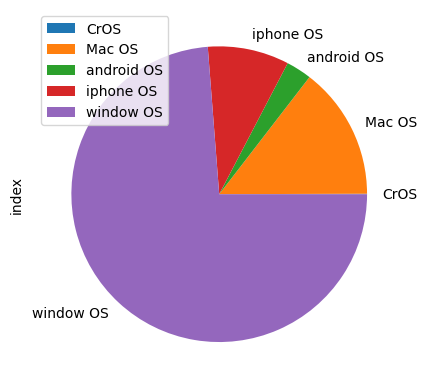

In [347]:
# plotting the number of user per operating system
d=df2.groupby(['operating_sys']).count()
d.plot(y='index',kind='pie')